#📌 Extracão

In [15]:
import pandas as pd
import json

with open('TelecomX_Data.json') as f:
    dados_json = json.load(f)
dados = pd.json_normalize(dados_json)
print(dados)

      customerID Churn customer.gender  customer.SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
0                 Yes                 Yes                9                Yes   
1                  No                  No    

#🔧 Transformação

In [16]:
dados.info()

dados = dados[dados['Churn'] != '']

dados['account.Charges.Total'] = dados['account.Charges.Total'].replace(' ', pd.NA)

dados['account.Charges.Total'] = pd.to_numeric(dados['account.Charges.Total'])

dados.dropna(subset=['account.Charges.Total'], inplace=True)

dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [17]:
# Dicionário de tradução
mapa_colunas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Churn',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Parceiro',
    'customer.Dependents': 'Dependentes',
    'customer.tenure': 'Meses_Contrato',
    'phone.PhoneService': 'Servico_Telefone',
    'phone.MultipleLines': 'Multiplas_Linhas',
    'internet.InternetService': 'Servico_Internet',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes',
    'account.Contract': 'Contrato',
    'account.PaperlessBilling': 'Fatura_Online',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'account.Charges.Monthly': 'Gasto_Mensal',
    'account.Charges.Total': 'Gasto_Total'
}
dados.rename(columns=mapa_colunas, inplace=True)

colunas_para_modificar = ['Parceiro', 'Dependentes', 'Servico_Telefone', 'Fatura_Online', 'Churn']

for coluna in colunas_para_modificar:
    dados[coluna] = dados[coluna].replace({'Yes': 'Sim', 'No': 'Nao'})

dados['Multiplas_Linhas'] = dados['Multiplas_Linhas'].replace({'No phone service': 'Sem servico de telefone'})
dados['Genero'] = dados['Genero'].replace({'Male': 'Masculino', 'Female': 'Feminino'})

colunas_internet = ['Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes']
for coluna in colunas_internet:
    dados[coluna] = dados[coluna].replace({'No internet service': 'Sem servico de internet'})

print(dados.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7032 non-null   object 
 1   Churn                 7032 non-null   object 
 2   Genero                7032 non-null   object 
 3   Idoso                 7032 non-null   int64  
 4   Parceiro              7032 non-null   object 
 5   Dependentes           7032 non-null   object 
 6   Meses_Contrato        7032 non-null   int64  
 7   Servico_Telefone      7032 non-null   object 
 8   Multiplas_Linhas      7032 non-null   object 
 9   Servico_Internet      7032 non-null   object 
 10  Seguranca_Online      7032 non-null   object 
 11  Backup_Online         7032 non-null   object 
 12  Protecao_Dispositivo  7032 non-null   object 
 13  Suporte_Tecnico       7032 non-null   object 
 14  Streaming_TV          7032 non-null   object 
 15  Streaming_Filmes      7032

In [21]:
import pandas as pd
import json

with open('TelecomX_Data.json') as f:
    dados_json = json.load(f)

dados = pd.json_normalize(dados_json)
dados.info()

dados = dados[dados['Churn'] != '']

dados['account.Charges.Total'] = dados['account.Charges.Total'].replace(' ', pd.NA)

dados['account.Charges.Total'] = pd.to_numeric(dados['account.Charges.Total'])

dados.dropna(subset=['account.Charges.Total'], inplace=True)

dados.info()

mapa_colunas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Churn',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Parceiro',
    'customer.Dependents': 'Dependentes',
    'customer.tenure': 'Meses_Contrato',
    'phone.PhoneService': 'Servico_Telefone',
    'phone.MultipleLines': 'Multiplas_Linhas',
    'internet.InternetService': 'Servico_Internet',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes',
    'account.Contract': 'Contrato',
    'account.PaperlessBilling': 'Fatura_Online',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'account.Charges.Monthly': 'Gasto_Mensal',
    'account.Charges.Total': 'Gasto_Total'
}
dados.rename(columns=mapa_colunas, inplace=True)

colunas_para_modificar = ['Parceiro', 'Dependentes', 'Servico_Telefone', 'Fatura_Online', 'Churn']

for coluna in colunas_para_modificar:
    dados[coluna] = dados[coluna].replace({'Yes': 'Sim', 'No': 'Nao'})

dados['Multiplas_Linhas'] = dados['Multiplas_Linhas'].replace({'No phone service': 'Sem servico de telefone'})
dados['Genero'] = dados['Genero'].replace({'Male': 'Masculino', 'Female': 'Feminino'})

colunas_internet = ['Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes']
for coluna in colunas_internet:
    dados[coluna] = dados[coluna].replace({'No internet service': 'Sem servico de internet'})

print(dados.info())


dados.to_csv('dados_tratados.csv', index=False)

print("\nArquivo 'dados_tratados.csv' foi salvo com sucesso na mesma pasta do seu script!")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#📊 Carga e análise

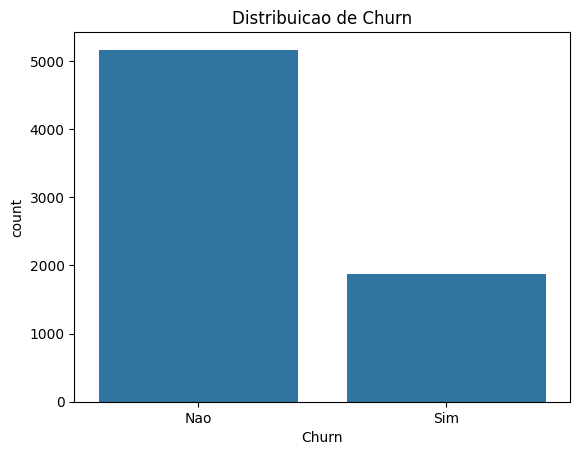

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=dados)
plt.title('Distribuicao de Churn')
plt.show()

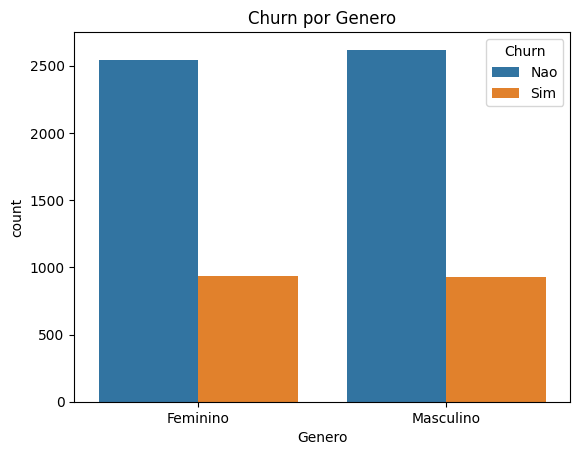

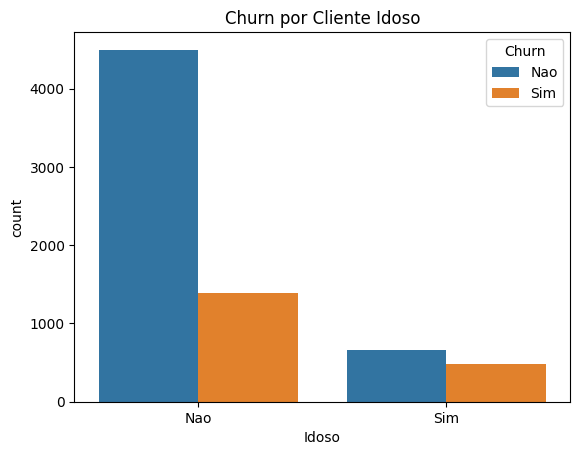

In [23]:
sns.countplot(x='Genero', hue='Churn', data=dados)
plt.title('Churn por Genero')
plt.show()

dados['Idoso'] = dados['Idoso'].replace({0: 'Nao', 1: 'Sim'})
sns.countplot(x='Idoso', hue='Churn', data=dados)
plt.title('Churn por Cliente Idoso')
plt.show()

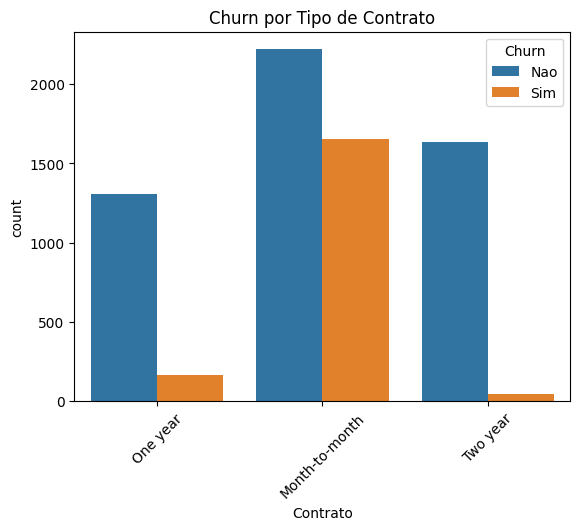

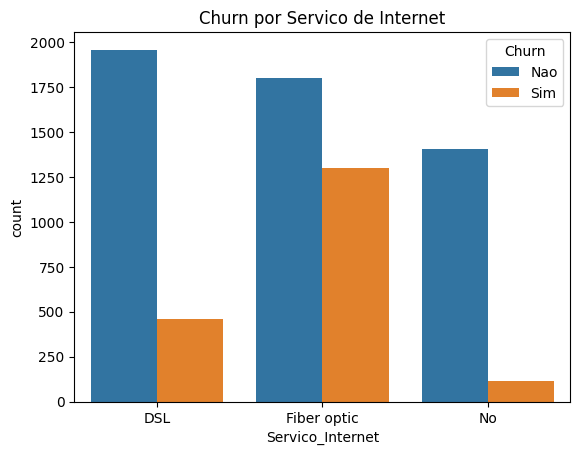

In [24]:
sns.countplot(x='Contrato', hue='Churn', data=dados)
plt.title('Churn por Tipo de Contrato')
plt.xticks(rotation=45)
plt.show()


sns.countplot(x='Servico_Internet', hue='Churn', data=dados)
plt.title('Churn por Servico de Internet')
plt.show()

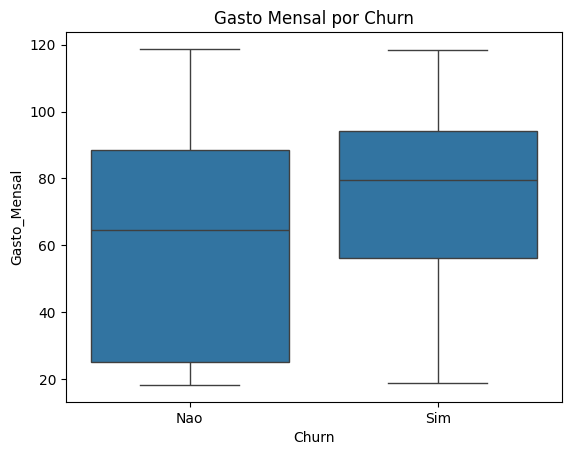

In [25]:
sns.boxplot(x='Churn', y='Gasto_Mensal', data=dados)
plt.title('Gasto Mensal por Churn')
plt.show()

#📄Relatorio Final

Relatório de Análise de Evasão de Clientes – Telecom X
Introdução

Este relatório detalha a análise de dados realizada para entender a evasão de clientes (churn) na Telecom X. O objetivo foi executar um processo de Extração, Transformação e Carga (ETL) e uma Análise Exploratória (EDA) para identificar os padrões de comportamento dos clientes que cancelam seus serviços, visando fornecer insights para a criação de estratégias de retenção.

Processo de Extração e Transformação de Dados (ETL)

Os dados da empresa, inicialmente em um arquivo JSON com estrutura aninhada, foram extraídos e normalizados para um formato de tabela usando a biblioteca Pandas. A etapa de tratamento foi crucial: registros com a coluna Churn vazia foram removidos, e a coluna de gastos totais, que continha valores em branco e formato de texto, foi corrigida e convertida para um tipo numérico. Para facilitar a análise, os nomes das colunas foram traduzidos para o português e os valores de texto, como "Yes"/"No", foram padronizados.

Análise Exploratória e Principais Achados

A análise exploratória dos dados limpos revelou insights significativos. Embora o gênero não tenha se mostrado um fator relevante, identificou-se que clientes idosos possuem uma propensão consideravelmente maior a cancelar os serviços. Os fatores mais críticos, no entanto, estão relacionados aos contratos e serviços. Clientes com contratos mensais apresentam uma taxa de churn drasticamente superior àqueles com contratos de longo prazo (um ou dois anos). Além disso, um ponto de atenção importante é que clientes com serviço de Fibra Óptica têm uma taxa de evasão mais alta que os de DSL, sugerindo possíveis problemas de satisfação ou custo-benefício com este serviço.

Conclusão e Recomendações

A análise permitiu definir um perfil de cliente com alta probabilidade de evasão: um cliente idoso, com contrato mensal e serviço de internet de Fibra Óptica. Com base nisso, recomenda-se que a empresa desenvolva estratégias focadas, como oferecer incentivos para a migração de contratos mensais para planos de longo prazo e aprofundar a investigação sobre a satisfação dos clientes de Fibra Óptica. Adicionalmente, a criação de ofertas direcionadas ao público idoso pode ajudar a aumentar a fidelidade. Os dados tratados e analisados fornecem uma base sólida para o desenvolvimento de modelos preditivos que permitirão à Telecom X agir proativamente para reter seus clientes.